# Installs per Genre Based on the ART_AND_DESIGN Category

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
apps = pd.read_csv('googleplaystore.csv')
#apps = app.drop(['App','Reviews', 'Size', 'Type', 'Price','Rating','Content Rating','Genres', 'Last Updated',
            #'Current Ver', 'Android Ver'], axis=1)
apps = apps.drop(apps.index[10472])#This had a '19' rating, causing scale issues
apps.Installs = apps.Installs.str.strip('+')
apps.Installs = apps.Installs.str.replace(',','')#Remove commas so values can be converted to numeric

In [3]:
apps['Installs'] = pd.to_numeric(apps['Installs'])

In [4]:
AnD = apps[apps.Category == 'ART_AND_DESIGN']
AnDmax = AnD['Installs'].max()
AnDmin = AnD['Installs'].min()
mostApp = AnD[AnD.Installs == AnDmax]
leastApp = AnD[AnD.Installs == AnDmin]

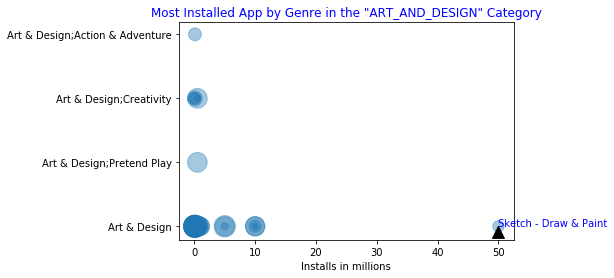

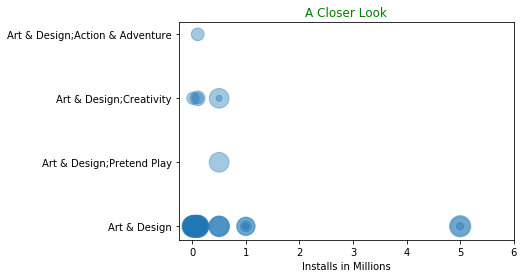

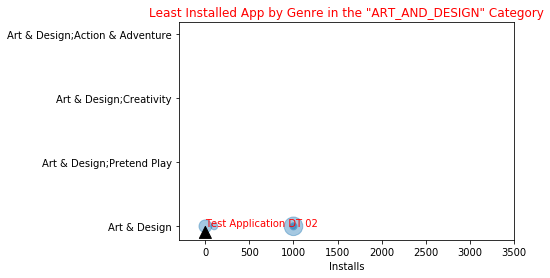

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(111)


X = apps[apps.Category == 'ART_AND_DESIGN'].Installs/10e5
x2 = apps[apps.Category == 'ART_AND_DESIGN'].Installs
y = apps[apps.Category == 'ART_AND_DESIGN'].Genres
z = np.random.rand(40)

xmax = AnD['Installs'].max()/10e5
ymax = AnD.Genres[AnD.Installs == AnDmax]
xmin = AnD['Installs'].min()/10e5
ymin = AnD.Genres[AnD.Installs == AnDmin]
maxtext = mostApp.App.values[0]
mintext = leastApp.App.values[0]

plt.scatter(X,y, s=z*500, alpha=0.4)
plt.title("Most Installed App by Genre in the \"ART_AND_DESIGN\" Category", color='blue')
plt.xlabel("Installs in millions")
ax1.annotate(f"{maxtext}", xy=(xmax, ymax), color='blue',
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

plt.scatter(X,y, s=z*500, alpha=0.4)
plt.title("A Closer Look", color='green')
plt.xlabel("Installs in Millions")
plt.xlim(-0.25, 6)
plt.show()

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)

plt.scatter(x2,y, s=z*500, alpha=0.4)
plt.title("Least Installed App by Genre in the \"ART_AND_DESIGN\" Category", color='red')
plt.xlabel("Installs")
ax2.annotate(f"{mintext}", xy=(xmin, ymin), color='red',
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlim(-300, 3500)
plt.show()

## *Art & Design is the most installed Genre within the ART_AND_DESIGN category* 

In [6]:
mostApp

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up


### *As per the first plot, the "Sketch - Draw & Paint" app clearly has the most installs in the ART_AND_DESIGN category at around 50 million installs. It is in the Art & Design genre. Above is this app's information.* 

In [7]:
leastApp

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8871,Test Application DT 02,ART_AND_DESIGN,NaN,0,1.2M,0,Free,0,Everyone,Art & Design,"March 14, 2017",4.0,4.2 and up


### *In the last plot, I've scaled it to better see the least installed apps in the ART_AND_DESIGN category. "Test Application DT 02" has the least with zero installs. It is also in the Art & Design genre. Above is this app's information.* 

In [13]:
gen = AnD.groupby('Genres').agg('sum')
gens = pd.DataFrame(columns=['Genres', 'Installs'], data=gen)
gens.Genres = gens.index
gens = gens.reset_index(drop=True)
gens

,Genres,Installs
0,Art & Design,122528100
1,Art & Design;Action & Adventure,100000
2,Art & Design;Creativity,1210000
3,Art & Design;Pretend Play,500000


### *The installs per genre within the ART_AND_DESIGN category above*